In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation

In [ ]:
from PIL import Image
import requests
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b3-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b3-finetuned-ade-512-512")

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [ ]:
model.save_pretrained('/content/drive/MyDrive/골프영상/segformer')

In [ ]:
def segment_image(input_dir, output_dir):
  dir_path = input_dir
  file_lst = os.listdir(dir_path)
  file_lst_jpg = []

  for i in file_lst:
    file_split = i.split('.')
    if file_split[-1] == 'jpg':
      file_lst_jpg.append(dir_path+'/'+i)

  class_colors = np.full((183,3), 0, dtype=np.uint16)
  class_colors[6] = [255,0,0]
  class_colors[9] = [0,255,0]
  class_colors[4] = [0,0,255]

  for i in file_lst_jpg:
    image = Image.open(i)
    original_width, original_height = image.size
    original_size = (original_height,original_width)
    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)
    probabilities = torch.softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1)
    upsampled_labels = torch.nn.functional.interpolate(predicted_labels.float().unsqueeze(0), size=original_size, mode="nearest").squeeze(0).long()

    upsampled_labels[upsampled_labels==0] = 9
    upsampled_labels[upsampled_labels==13] = 9
    upsampled_labels[upsampled_labels==52] = 6
    upsampled_labels[upsampled_labels==5] = 4

    upsampled_labels = upsampled_labels.numpy()
    upsampled_labels[np.isin(upsampled_labels, [4,6,9], invert=True)] = 0

    filename = i.split('/')[-1][:-4]
    np.savetxt(output_dir+'/'+filename+'.txt', upsampled_labels[0], fmt='%d')
    # np.save(output_dir+'/'+filename+'.txt', upsampled_labels[0])

In [ ]:
from glob import glob

In [ ]:
image1 = glob('/content/drive/MyDrive/골프영상/주행영상_5/')

In [ ]:
image1[0]

'/content/drive/MyDrive/골프영상/주행영상_5/1REC_2022_10_05_11_42_58_F/frame600.jpg'

In [1]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/1REC_2022_10_05_11_42_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/1REC_2022_10_05_11_42_58_F/결과/')

NameError: ignored

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/결과/')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_38_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_38_58_F/결과/')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_39_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_39_58_F/결과/')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_40_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_40_58_F/결과')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_41_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_41_58_F/결과')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_43_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_43_58_F/결과')

In [ ]:
segment_image('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_44_58_F/', '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_44_58_F/결과')

In [ ]:
segment_text = np.loadtxt('/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/결과/frame4701.txt')
image = '/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/frame4701.jpg'

In [ ]:
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_44_58_F/결과/frame270.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_44_58_F/frame270.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_43_58_F/결과/frame1666.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_43_58_F/frame1666.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_41_58_F/결과/frame2387.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_41_58_F/frame2387.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_40_58_F/결과/frame2950.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_41_58_F/frame2950.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_39_58_F/결과/frame4122.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_39_58_F/frame4122.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_38_58_F/결과/frame3565.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_38_58_F/frame3565.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/1REC_2022_10_05_11_42_58_F/결과/frame1099.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/1REC_2022_10_05_11_42_58_F/frame1099.jpg'

'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/결과/frame4701.txt'
'/content/drive/MyDrive/골프영상/주행영상_5/REC_2022_10_05_11_37_58_F/frame4701.jpg'


In [ ]:
image = Image.open(image)

In [ ]:
segment_value = torch.Tensor(segment_text)

In [ ]:
segment_value = segment_value.int()

In [ ]:
class_colors = np.full((183,3), 0, dtype=np.uint16)
class_colors[6] = [255,0,0]
class_colors[9] = [0,255,0]
class_colors[4] = [0,0,255]

In [ ]:
colored_masks = class_colors[segment_value]

In [ ]:
image_np = np.array(image)

In [ ]:
alpha = 1  # 원하는 투명도 값 (0.0 ~ 1.0)
overlay_np = (colored_masks * alpha).astype(np.uint8)

In [ ]:
combined_np = (np.array(image) * (1 - alpha) + overlay_np).astype(np.uint8)

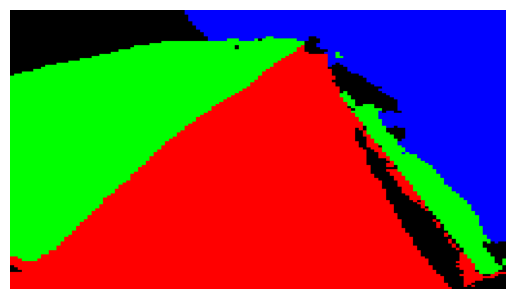

In [ ]:
plt.imshow(combined_np)
plt.axis('off')
plt.show()

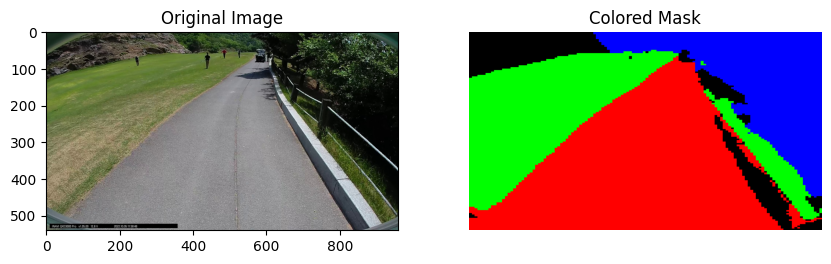

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(colored_masks)
plt.title("Colored Mask")
plt.axis('off')
plt.show()

In [ ]:
combined_image = Image.fromarray(combined_np)
combined_image.save("output.png", "PNG")

practice

In [ ]:
image = Image.open('/content/drive/MyDrive/계명대학교_최현성_분석연습/이미지짜르기/testimg1.jpg')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

In [ ]:
probabilities = torch.softmax(logits, dim=1)
predicted_labels = torch.argmax(probabilities, dim=1)

In [ ]:
predicted_labels[predicted_labels==0] = 9
predicted_labels[predicted_labels==13] = 9
predicted_labels[predicted_labels==52] = 6

In [ ]:
class_colors = np.full((183,3), 0, dtype=np.uint16)
class_colors[6] = [255,0,0]
class_colors[9] = [0,255,0]
class_colors[4] = [0,0,255]

colored_masks = class_colors[predicted_labels[0]]

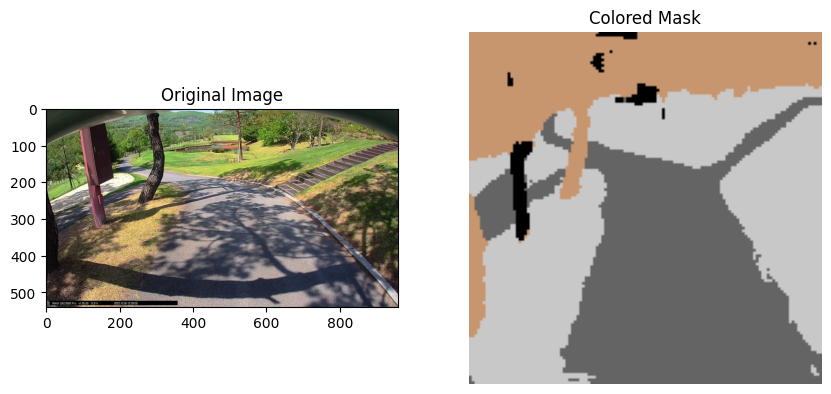

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(colored_masks)
plt.title("Colored Mask")
plt.axis('off')
plt.show()

In [ ]:
cd "/content/drive/My Drive/골프영상"
!git clone